# Placement Prediction

**Objective** <br>
The main objective is to identify the factors that influence campus recruitments of engineering college students, with the aim of  <br>
identifying those students who have a high probability of getting placed in college placements.<br>

In [2]:
#importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

#to read data into dataframe from a csv file
data=pd.read_csv(r"placedata v2.0 synthetic.csv")
data

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


#to check null values

In [3]:
data.isnull().sum()

StudentID                    0
CGPA                         0
Internships                  0
Projects                     0
Workshops/Certifications     0
AptitudeTestScore            0
SoftSkillsRating             0
ExtracurricularActivities    0
PlacementTraining            0
SSC_Marks                    0
HSC_Marks                    0
PlacementStatus              0
dtype: int64

#data has no null values

In [5]:
#to get all information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [6]:
#to find all columns of data
data.columns

Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [9]:
for col in data.columns:
     print(data[col].nunique())

10000
27
3
4
4
31
19
2
2
36
32
2


In [10]:
data.describe

<bound method NDFrame.describe of       StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0             1   7.5            1         1                         1   
1             2   8.9            0         3                         2   
2             3   7.3            1         2                         2   
3             4   7.5            1         1                         2   
4             5   8.3            1         2                         2   
...         ...   ...          ...       ...                       ...   
9995       9996   7.5            1         1                         2   
9996       9997   7.4            0         1                         0   
9997       9998   8.4            1         3                         0   
9998       9999   8.9            0         3                         2   
9999      10000   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0     

# columns of categorial data type

In [12]:
#using fun_cat function we find Columns that are Categorical data type.
cat=[]
for col in data.columns:
    if data[col].nunique()<=30:
        cat.append(col)

print("Columns that are Categorical data type are:",cat)

#cat list is created,having Categorical data type

Columns that are Categorical data type are: ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'SoftSkillsRating', 'ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']


In [13]:
# using fun_con function we find Columns that are Numeric data type.
con=[]
con1=data.drop(cat,axis=1) 
con.append(con1.columns)
con
#con list is created,having Numeric data type

[Index(['StudentID', 'AptitudeTestScore', 'SSC_Marks', 'HSC_Marks'], dtype='object')]

In [14]:
#dataframe of cat
data_cat=data.loc[:,cat]

#dataframe of col
data_col=data.drop(cat,axis=1)

# To replace missing values of categorial columns with mode value

In [15]:
def fun_cate1(col):
    if data_cat[col].isnull().sum()>0:
        data_cat[col].fillna(data_cat[col].mode()[0],inplace=True)
    print(f"{col}:Number of category is {data_cat[col].unique()}")
    print(f"{col}:Missing Value is {data_cat[col].isnull().sum()}")
    print("\n")

In [16]:
for col in data_cat.columns:
    fun_cate1(col)

CGPA:Number of category is [7.5 8.9 7.3 8.3 7.  7.7 6.5 7.8 7.9 7.4 8.6 8.2 6.8 7.6 6.7 8.4 8.5 6.9
 8.1 8.8 8.  6.6 7.2 7.1 8.7 9.  9.1]
CGPA:Missing Value is 0


Internships:Number of category is [1 0 2]
Internships:Missing Value is 0


Projects:Number of category is [1 3 2 0]
Projects:Missing Value is 0


Workshops/Certifications:Number of category is [1 2 0 3]
Workshops/Certifications:Missing Value is 0


SoftSkillsRating:Number of category is [4.4 4.  4.8 4.5 4.2 3.5 3.9 4.6 4.1 4.7 3.4 3.8 4.3 3.6 3.3 3.2 3.7 3.
 3.1]
SoftSkillsRating:Missing Value is 0


ExtracurricularActivities:Number of category is ['No' 'Yes']
ExtracurricularActivities:Missing Value is 0


PlacementTraining:Number of category is ['No' 'Yes']
PlacementTraining:Missing Value is 0


PlacementStatus:Number of category is ['NotPlaced' 'Placed']
PlacementStatus:Missing Value is 0




# To replace missing values of Continues columns with mean value

In [17]:
def fun_num(i):
    if data_col[i].isnull().sum()>0:
        data_col[i].fillna(data_col[i].mean(),inplace=True)
    
    print(f"{i}:Missing Value is {data_col[i].isnull().sum()}")    

In [18]:
for i in data_col.columns:
    fun_num(i)   

StudentID:Missing Value is 0
AptitudeTestScore:Missing Value is 0
SSC_Marks:Missing Value is 0
HSC_Marks:Missing Value is 0


# To perform Univariate analysis categorial columns¶

**Exploring CGPA**

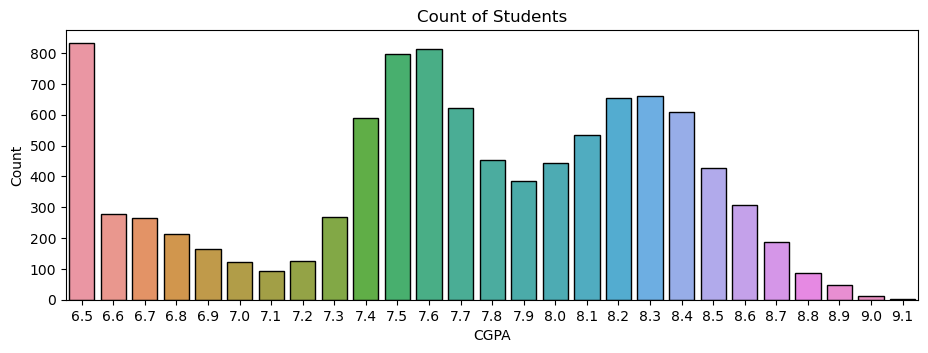

In [44]:
plt.figure(figsize=(11,3.5))
sb.countplot(x=data['CGPA'],edgecolor='black',linewidth=1) 
plt.title('Count of Students')
plt.ylabel("Count")
plt.show()

**Observation:**<br>
    800 students have CGPA 6.5 & 7.6
    

 **Exploring Internships**

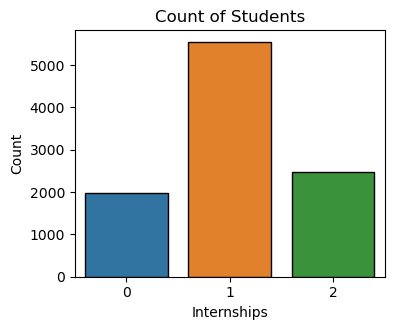

In [49]:
plt.figure(figsize=(4,3.2))
sb.countplot(x=data['Internships'],edgecolor='black',linewidth=1) 
plt.title('Count of Students')
plt.ylabel("Count")
plt.show()

**Observation**<br>
5000+ Students have done 1 Internships

**Exploring Projects**

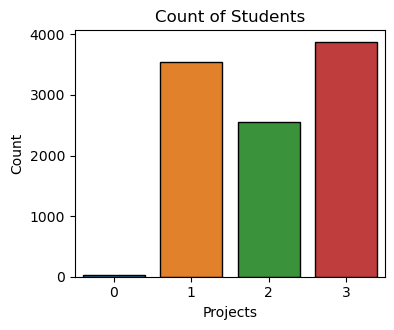

In [50]:
plt.figure(figsize=(4,3.2))
sb.countplot(x=data['Projects'],edgecolor='black',linewidth=1) 
plt.title('Count of Students')
plt.ylabel("Count")
plt.show()

**Observation**<br>
3900 students have done 3 Projects.

**Exploring Workshops/Certifications**

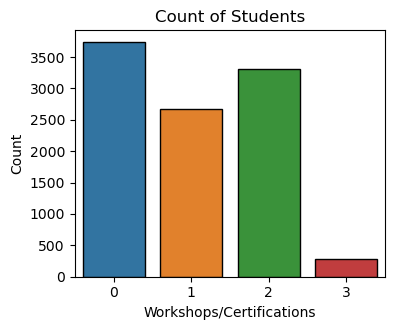

In [51]:
plt.figure(figsize=(4,3.2))
sb.countplot(x=data['Workshops/Certifications'],edgecolor='black',linewidth=1) 
plt.title('Count of Students')
plt.ylabel("Count")
plt.show()

**Observation**<br>
3500 students have 0 certifications/Workshops

**Exploring SoftSkillsRating**

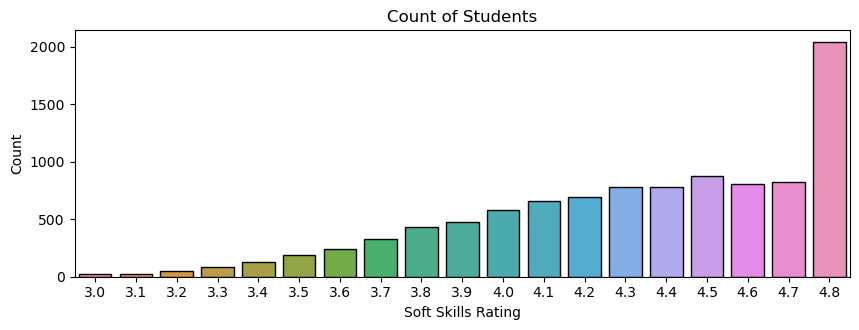

In [56]:
plt.figure(figsize=(10,3.2))
sb.countplot(x=data['SoftSkillsRating'],edgecolor='black',linewidth=1) 
plt.title('Count of Students')
plt.xlabel("Soft Skills Rating")
plt.ylabel("Count")
plt.show()

**Observation**<br>
2000 students have 4.8 Soft Skills Rating.

**Exploring Extra curricular Activities**

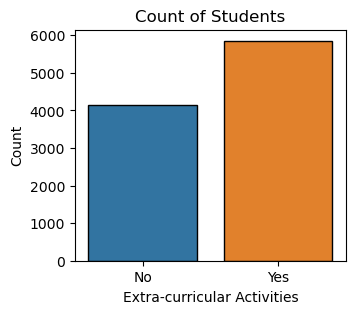

In [60]:
plt.figure(figsize=(3.5,3))
sb.countplot(x=data['ExtracurricularActivities'],edgecolor='black',linewidth=1) 
plt.title('Count of Students')
plt.xlabel("Extra-curricular Activities")
plt.ylabel("Count")
plt.show()

**Observation**<br>
5500+ students have Extra-Curricular Activities.

**Exploring Placement Training**

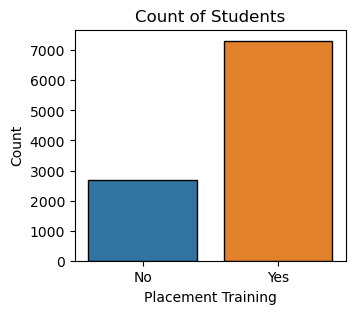

In [61]:
plt.figure(figsize=(3.5,3))
sb.countplot(x=data['PlacementTraining'],edgecolor='black',linewidth=1) 
plt.title('Count of Students')
plt.xlabel("Placement Training")
plt.ylabel("Count")
plt.show()

**Observation**<br>
7000 students have taken Placement Training.

# Univariate Analysis on Numerical data

Text(0.5, 1.0, 'Box Plot for Aptitude Test Score')

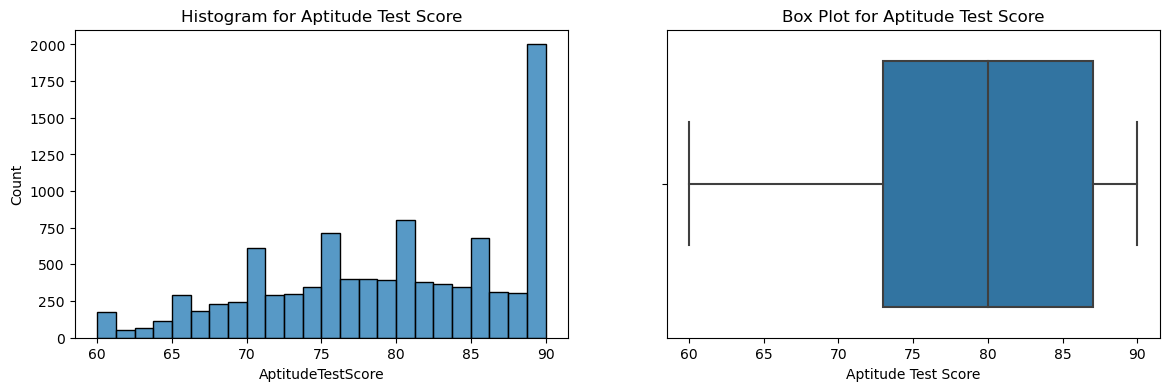

In [65]:
#AptitudeTestScore:
fig,ax=plt.subplots(1,2,figsize=(14,4))

sb.histplot(x=data['AptitudeTestScore'],ax=ax[0])
ax[0].set_title('Histogram for Aptitude Test Score')

sb.boxplot(x=data['AptitudeTestScore'],ax=ax[1])
plt.xlabel('Aptitude Test Score')
ax[1].set_title('Box Plot for Aptitude Test Score')

**Observation:** <br>
    2000 Students have Aptitude Test Score 90 , AptitudeTestScore has no outliers.

**Exploring SSC Marks**

Text(0.5, 1.0, 'Box Plot for SSC Marks')

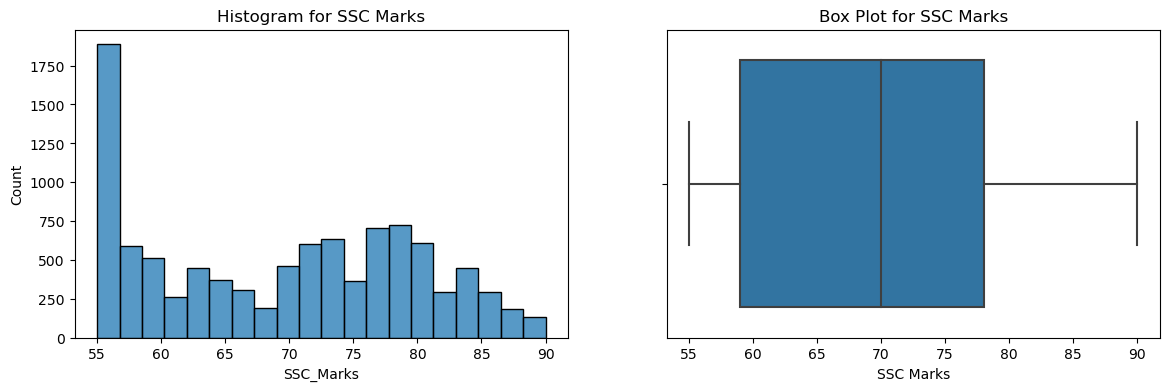

In [70]:
fig,ax=plt.subplots(1,2,figsize=(14,4))

sb.histplot(x=data['SSC_Marks'],ax=ax[0])
ax[0].set_title('Histogram for SSC Marks')

sb.boxplot(x=data['SSC_Marks'],ax=ax[1])
plt.xlabel('SSC Marks')
ax[1].set_title('Box Plot for SSC Marks')


**Observation:** <br>
    1800 Students have SSC Marks 50 , SSC Marks has no outliers.

**Exploring HSC Marks**

Text(0.5, 1.0, 'Box Plot for HSC Marks')

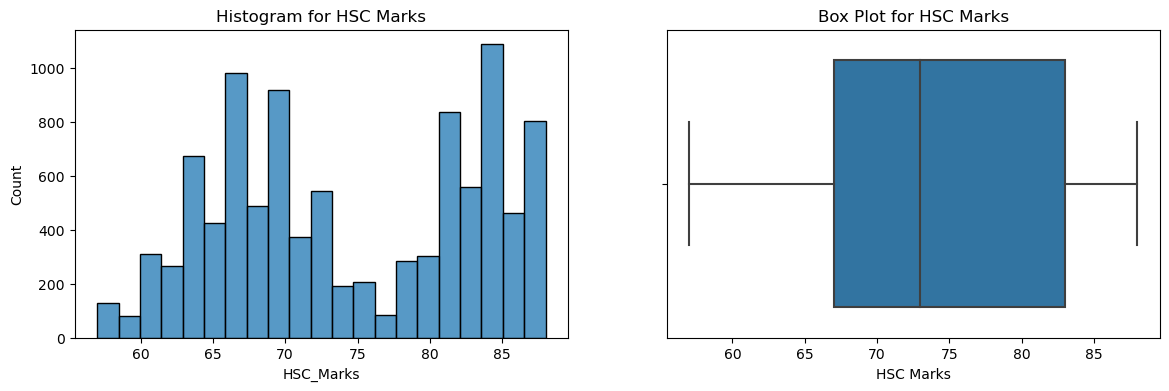

In [71]:
fig,ax=plt.subplots(1,2,figsize=(14,4))

sb.histplot(x=data['HSC_Marks'],ax=ax[0])
ax[0].set_title('Histogram for HSC Marks')

sb.boxplot(x=data['HSC_Marks'],ax=ax[1])
plt.xlabel('HSC Marks')
ax[1].set_title('Box Plot for HSC Marks')


**Observation:** <br>
    1000+ Students have HSC Marks 85 , HSC Marks has no outliers.

# Bivariate & Multi Variate Analysis

**What should be the CGPA Score??**

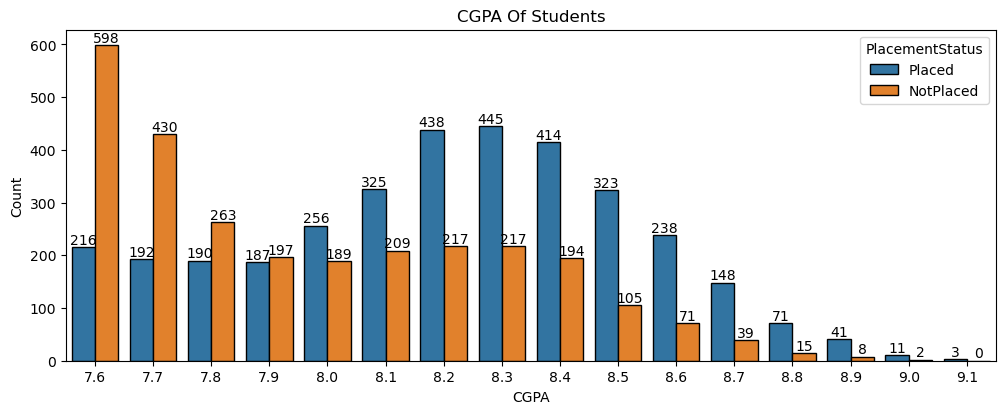

In [122]:
#show no on bar

fig, ax = plt.subplots(figsize= (12,4.3))
data1=data[data["CGPA"]>7.5]
ax = sb.countplot(x=data1['CGPA'],hue=data1['PlacementStatus'],edgecolor='black',linewidth=1)
for bar in ax.patches:      
    percentage =f"{round(bar.get_height() )}"                                                                              
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )  
plt.title('CGPA Of Students')
plt.xlabel('CGPA')
plt.ylabel('Count')
plt.show()


**Observation:** <br>
    To secure placement, students should have a CGPA score greater than 8

**What Should be the Aptitude Test Score of Students whose CGPA score greater than 8?**

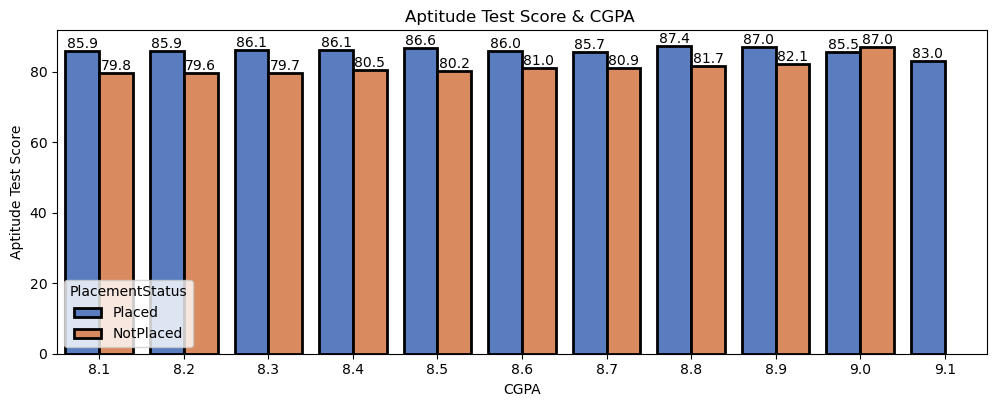

In [190]:
fig, ax = plt.subplots(figsize= (12,4.2))
data1=data[data["CGPA"]>8]
ax = sb.barplot(x=data1['CGPA'],y=data1['AptitudeTestScore'],hue=data1['PlacementStatus'],data=data,palette='muted',ci=False,edgecolor='black',linewidth=2)
for bar in ax.patches:                                             
    percentage =f"{round(bar.get_height(),1)}"                    
    x = bar.get_x() + bar.get_width() /2                           
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" ) 
plt.title('Aptitude Test Score & CGPA ')
plt.xlabel('CGPA')
plt.ylabel('Aptitude Test Score')
plt.show()

**Observation:** <br>
    To secure placement, students should have a Aptitude Test Score  greater than 85

**What Should be the HSC Score of Student?**

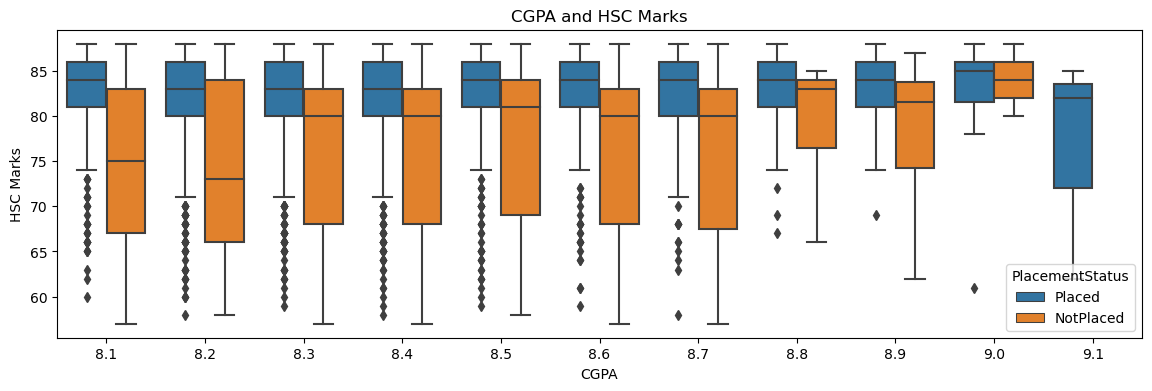

In [188]:
plt.figure(figsize=(14,4))
data1=data[data["CGPA"]>8]
sb.boxplot(x=data1['CGPA'],y=data1['HSC_Marks'],hue=data1['PlacementStatus'])
plt.title('CGPA and HSC Marks')
plt.xlabel('CGPA')
plt.ylabel('HSC Marks')
plt.show()

**Observation:**<br>
To secure placement, students should have a HSC score greater than 80

**Does the number of internships have an impact on placements?**

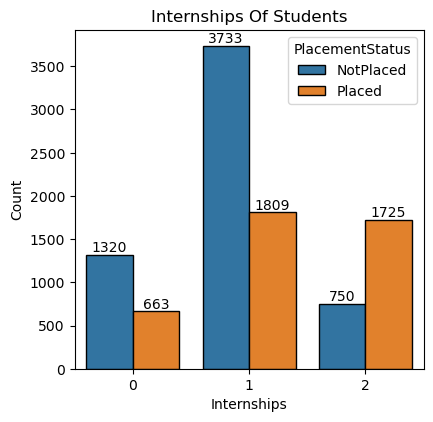

In [92]:
#show no on bar
fig, ax = plt.subplots(figsize= (4.5,4.4))
ax = sb.countplot(x=data['Internships'],hue=data['PlacementStatus'],edgecolor='black',linewidth=1)
for bar in ax.patches:      
    percentage =f"{round(bar.get_height() )}"                                                                              
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )  
plt.title('Internships Of Students')
plt.xlabel('Internships')
plt.ylabel('Count')
plt.show()

**Observation:** <br>
    To secure placement, students should complete atleast one Internship

**Does the number of Projects have an impact on placements?**

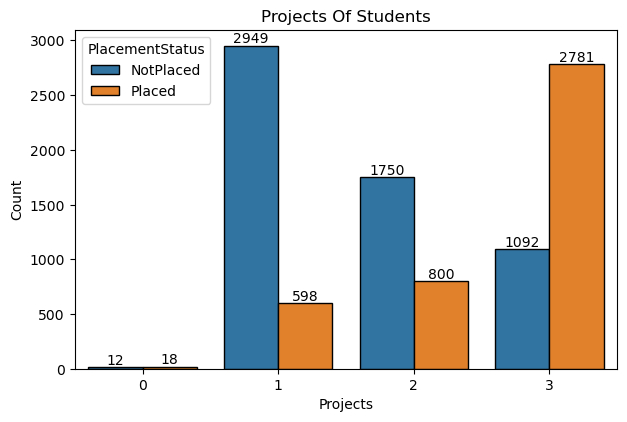

In [96]:
#show no on bar
fig, ax = plt.subplots(figsize= (7,4.4))
ax = sb.countplot(x=data['Projects'],hue=data['PlacementStatus'],edgecolor='black',linewidth=1)
for bar in ax.patches:      
    percentage =f"{round(bar.get_height() )}"                                                                              
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )  
plt.title('Projects Of Students')
plt.xlabel('Projects')
plt.ylabel('Count')
plt.show()

**Observation:**<br>
To secure placement, students should complete 3 Projects

**Does the number of Workshops/Certifications have an impact on placements?**

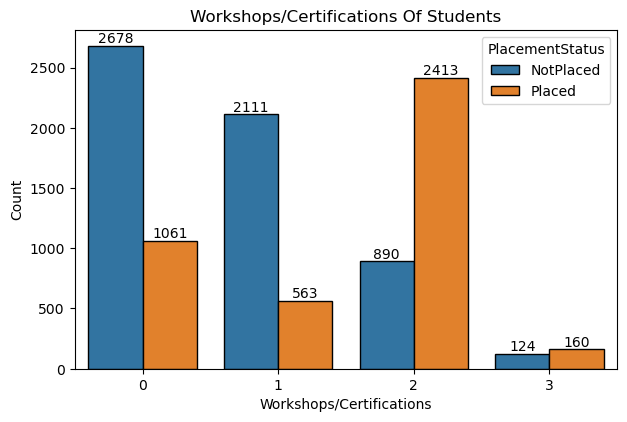

In [97]:
#show no on bar
fig, ax = plt.subplots(figsize= (7,4.4))
ax = sb.countplot(x=data['Workshops/Certifications'],hue=data['PlacementStatus'],edgecolor='black',linewidth=1)
for bar in ax.patches:      
    percentage =f"{round(bar.get_height() )}"                                                                              
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )  
plt.title('Workshops/Certifications Of Students')
plt.xlabel('Workshops/Certifications')
plt.ylabel('Count')
plt.show()

**Observation:**<br>
To secure placement, students should complete at least two certifications or workshops

**What should be the soft skill rating of a student to secure placement?**

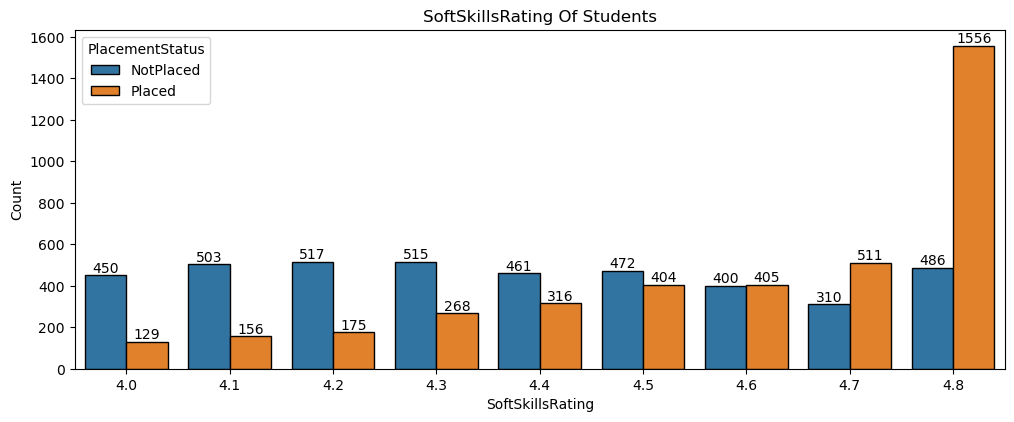

In [101]:
#show no on bar
fig, ax = plt.subplots(figsize= (12,4.4))
data1=data[data["SoftSkillsRating"]>3.9]
ax = sb.countplot(x=data1['SoftSkillsRating'],hue=data1['PlacementStatus'],edgecolor='black',linewidth=1)
for bar in ax.patches:      
    percentage =f"{round(bar.get_height() )}"                                                                              
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )  
plt.title('SoftSkillsRating Of Students')
plt.xlabel('Soft Skills Rating')
plt.ylabel('Count')
plt.show()

**Observation:**<br>
To secure placement, students should have Soft Skills Rating 4.8

**Does the Extra-curricular Activities have an impact on placements?**

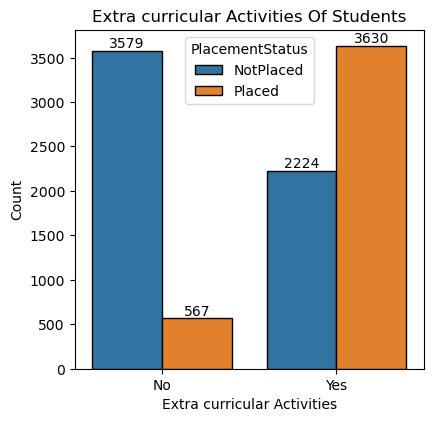

In [105]:
#show no on bar
fig, ax = plt.subplots(figsize= (4.5,4.4))
ax = sb.countplot(x=data['ExtracurricularActivities'],hue=data['PlacementStatus'],edgecolor='black',linewidth=1)
for bar in ax.patches:      
    percentage =f"{round(bar.get_height() )}"                                                                              
    x = bar.get_x() + bar.get_width() /2
    y = bar.get_height()                                            
    ax.annotate(percentage, (x, y), va = "bottom", ha ="center" )  
plt.title('Extra curricular Activities Of Students')
plt.xlabel('Extra curricular Activities')
plt.ylabel('Count')
plt.show()

**Observation:**<br>
To secure placement, students should have Extra curricular Activities.

**What Should be the HSC & SSC Marks?**

Text(0.5, 1.0, 'Placement Training & Aptitude Test Score')

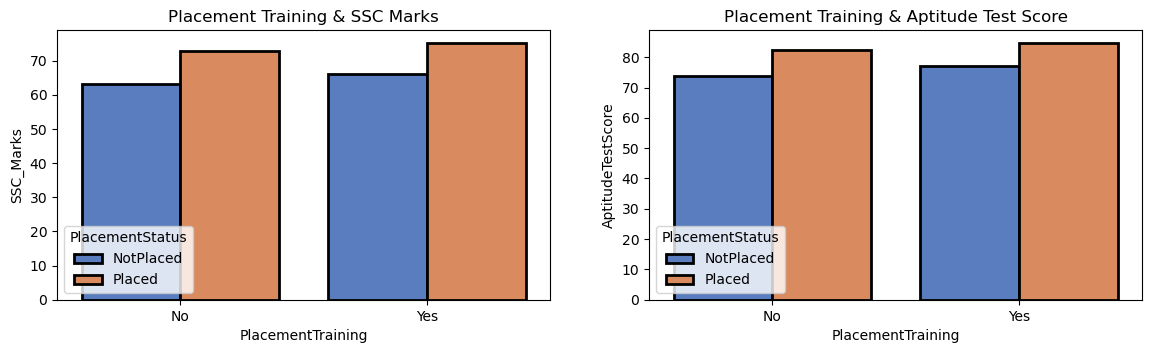

In [162]:
fig,ax=plt.subplots(1,2,figsize=(14,3.5))
sb.barplot(x=data['PlacementTraining'],y=data['SSC_Marks'],hue=data['PlacementStatus'],data=data,
           palette='muted',ci=False,edgecolor='black',linewidth=2,ax=ax[0])
ax[0].set_title('Placement Training & SSC Marks')


sb.barplot(x=data['PlacementTraining'],y=data['AptitudeTestScore'],hue=data['PlacementStatus'],data=data,
           palette='muted',ci=False,edgecolor='black',linewidth=2,ax=ax[1])
ax[1].set_title('Placement Training & Aptitude Test Score')


In [161]:
data.groupby('PlacementStatus')['SSC_Marks','AptitudeTestScore'].mean()

,SSC_Marks,AptitudeTestScore
PlacementStatus,,
NotPlaced,64.992590,75.829399
Placed,74.920658,84.455802


**Observation**<br>
SSC Marks should be greater than 74.9 & Aptitude Test Score should be greater than 84.45


**Is Placement Training necessary to get good marks in SSC  & Aptitude Tests?**

Text(0.5, 1.0, 'Placement Training & SSC Marks')

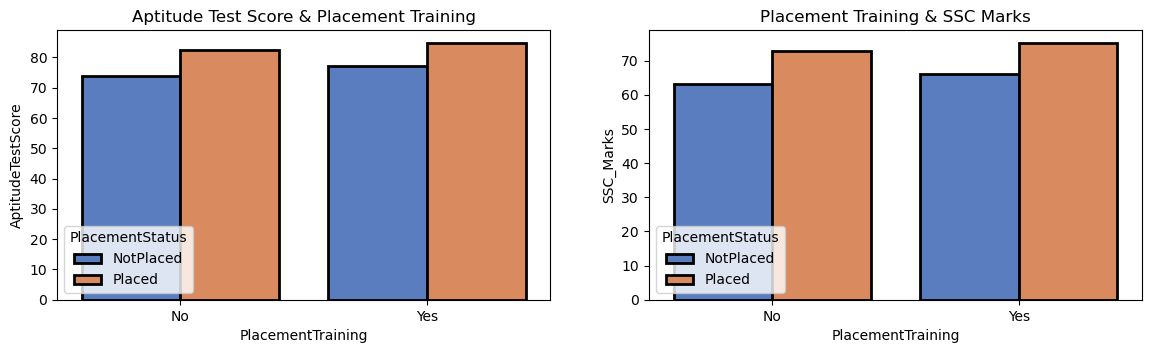

In [163]:

fig,ax=plt.subplots(1,2,figsize=(14,3.5))
sb.barplot(x=data['PlacementTraining'],y=data['AptitudeTestScore'],hue=data['PlacementStatus'],data=data,
           palette='muted',ci=False,edgecolor='black',linewidth=2,ax=ax[0])
ax[0].set_title('Aptitude Test Score & Placement Training')


sb.barplot(x=data['PlacementTraining'],y=data['SSC_Marks'],hue=data['PlacementStatus'],data=data,
           palette='muted',ci=False,edgecolor='black',linewidth=2,ax=ax[1])
ax[1].set_title('Placement Training & SSC Marks')


In [165]:
data.groupby(['PlacementStatus','PlacementTraining'])['SSC_Marks','AptitudeTestScore'].mean()

SSC_Marks  AptitudeTestScore
PlacementStatus PlacementTraining                              
NotPlaced       No                 63.247350          73.888693
                Yes                66.109070          77.070924
Placed          No                 72.722488          82.349282
                Yes                75.163800          84.688807

**Observation:**<br>
    Students who have undergone placement training tend to achieve higher scores in SSC, and aptitude tests, increasing their chances of securing placements

**Does HSC Marks impact SSC Marks?**

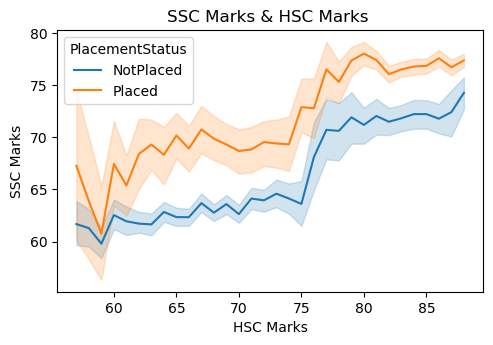

In [175]:
plt.figure(figsize=(5.5,3.4))
sb.lineplot(y=data['SSC_Marks'],x=data['HSC_Marks'],hue=data['PlacementStatus'])
plt.title('SSC Marks & HSC Marks ')
plt.ylabel('SSC Marks')
plt.xlabel('HSC Marks')
plt.show()


**Observation:**<br>
Students having Higher HSC Marks has Higher SSC Marks. It shows Positive Relation.

**Does HSC Marks impact Aptitude Test Score?**

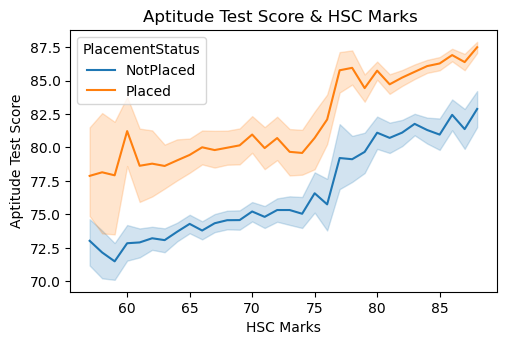

In [176]:
plt.figure(figsize=(5.5,3.4))
sb.lineplot(y=data['AptitudeTestScore'],x=data['HSC_Marks'],hue=data['PlacementStatus'])
plt.title('Aptitude Test Score & HSC Marks ')
plt.ylabel('Aptitude Test Score')
plt.xlabel('HSC Marks')
plt.show()

**Observation:**<br>
Students having Higher HSC Marks has Higher Aptitude Test Score . It shows Positive Relation.

**InterPretation:**<br>
    800 students have CGPA 6.5 & 7.6<br>
5000+ Students have done 1 Internships.<br>
3900 students have done 3 Projects.<br>
3500 students have 0 certifications/Workshops.<br>
2000 students have 4.8 Soft Skills Rating.<br>
5500+ students have Extra-Curricular Activities.<br>
7000 students have taken Placement Training.<br>
2000 Students have Aptitude Test Score 90 , AptitudeTestScore has no outliers.<br>
1800 Students have SSC Marks 50 , SSC Marks has no outliers.<br>
1000+ Students have HSC Marks 85 , HSC Marks has no outliers.<br>
To secure placement, students should have a CGPA score greater than 8.<br>
To secure placement, students should have a Aptitude Test Score greater than 85.<br>
To secure placement, students should have a HSC score greater than 80.<br>
To secure placement, students should complete atleast one Internship.<br>
To secure placement, students should complete 3 Projects.<br>
To secure placement, students should complete at least two certifications or workshops.<br>
To secure placement, students should have Soft Skills Rating 4.8<br>
To secure placement, students should have Extra curricular Activities.<br>
SSC Marks should be greater than 74.9 & Aptitude Test Score should be greater than 84.45<br>
Students who have undergone placement training tend to achieve higher scores in SSC, and aptitude tests, increasing their chances of securing placements.<br>
Students having Higher HSC Marks has Higher SSC Marks. It shows Positive Relation.<br>
Students having Higher HSC Marks has Higher Aptitude Test Score . It shows Positive Relation.<br>

# Suggestions:

**To secure placement**
<br>
1) students should have a CGPA score greater than 8.<br>
2) Students should have a Aptitude Test score greater than 85.<br>
3) Students should have a HSC score greater than 80.<br>
4) Students should complete atleast one Internship.<br>
5) Students should complete 3 Projects.<br>
6) Students should complete at least two certifications or workshops.<br>
7) Students should have Soft Skills Rating 4.8<br>
8) Students should have Extra curricular Activities.<br>
9) SSC Marks should be greater than 74.9 & 
10) Students who have undergone placement training tend to achieve higher scores in SSC, and 
aptitude tests, <br>increasing their chances of securing placements.<br>
11) Students having Higher HSC Marks has Higher SSC Marks.<br>
12) Students having Higher HSC Marks has Higher Aptitude Test Score <br>